<a href="https://colab.research.google.com/github/mohammadsohail825/Diwali-Sale-Analysis/blob/main/Diwali_sale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for Visualizing data
%matplotlib inline
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Data /Diwali Sales Data.csv',encoding='unicode_escape')

In [6]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [7]:
!pip install pandas_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 52.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6ac254b436bafa5d64959da6d169b34a500a3e8bbded42c2c36adc82dff4a541
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [8]:
df.shape

(11251, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [10]:
#drop unrelated/blank columns
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [11]:
df.info() # get information data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [12]:
pd.isnull(df).sum() # find null value

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [13]:
df.shape # chekc data frame shape

(11251, 13)

In [14]:
#Drop Null values
df.dropna(inplace=True)

In [15]:
df.shape # Chek null value row remove or not

(11239, 13)

In [16]:
pd.isnull(df).sum() # chek null value after running code

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [17]:
#Chage Data types
df['Amount'] = df['Amount'].astype('int') # Change Amount data type float to integer.

In [18]:
df.info() # Amount data type change in to integer.

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


In [19]:
df['Amount'].dtypes #Check datatype seprate

dtype('int64')

In [20]:
df.columns #find all column name

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [21]:
#rename column
df.rename(columns={'Marital_Status':'Shadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [22]:
#describe() method returns description of the data in the dataframe (like count, mean, minimum, std)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [23]:
# use describe for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


### Explory Data Analysis

In [24]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='count'>

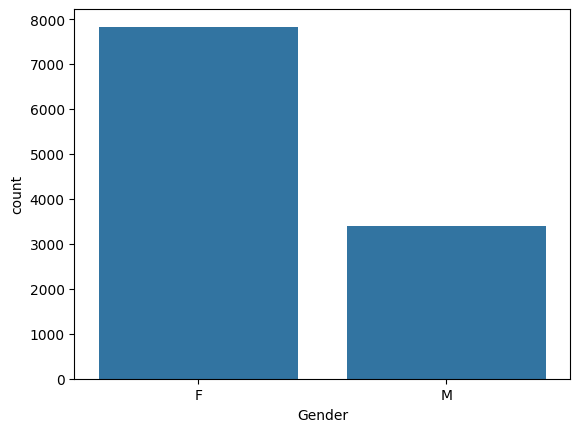

In [25]:
sns.countplot(x='Gender', data = df)

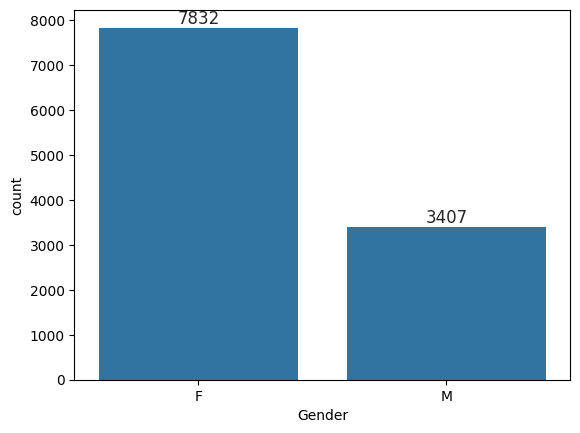

In [26]:
ax = sns.countplot(x='Gender', data = df)
sns.set(rc={'figure.figsize':(10,5)})
for bars in ax.containers:
  ax.bar_label(bars)

<ipython-input-27-c02803d30803>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data = df, palette='Set1')


<Axes: xlabel='Gender', ylabel='count'>

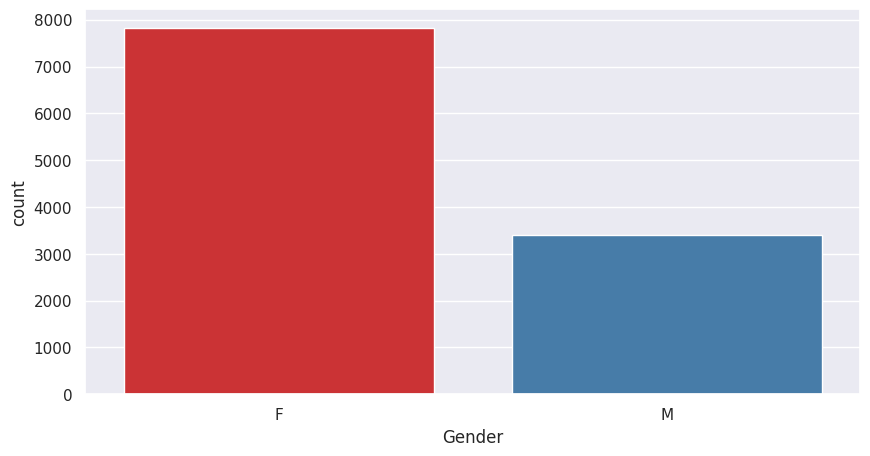

In [27]:
#change color for bar
sns.countplot(x='Gender', data = df, palette='Set1')

#Age group


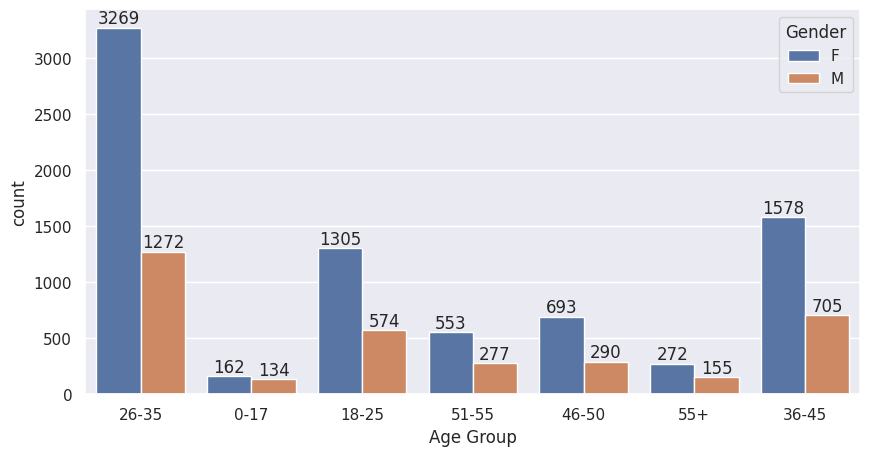

In [28]:
ax = sns.countplot(x='Age Group', data = df, hue= 'Gender') # Find Graph acording to Age Group.
for bars in ax.containers: # this code using for showing bar on chart
  ax.bar_label(bars)


Frome above graphs we can see Count of age group 26-35 shoping more than other and female shopping hiegher than men.

<ipython-input-29-d4bf15c6a59d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y= 'Amount', data = sales_age, palette='Set1')


<Axes: xlabel='Age Group', ylabel='Amount'>

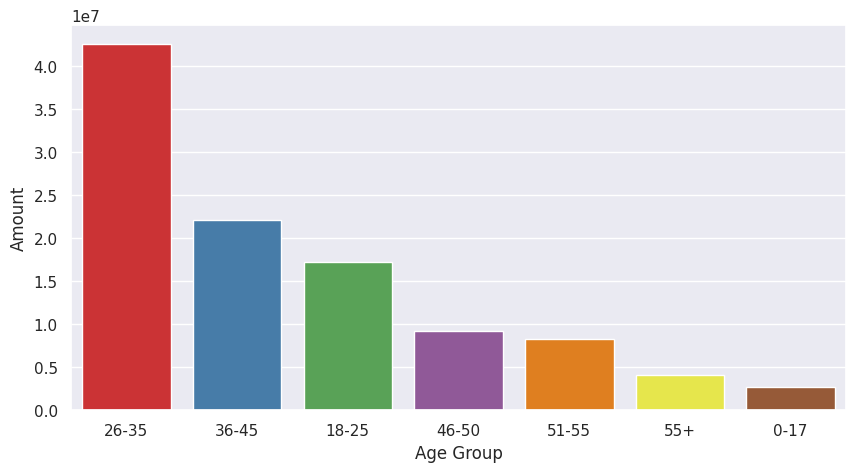

In [29]:
#Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.barplot(x='Age Group', y= 'Amount', data = sales_age, palette='Set1')


Most of the age group 26-35 are most the buyer in this age group.


### Satates Based

<ipython-input-30-968357c3a089>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'State', y = 'Orders',palette='Set1')


<Axes: xlabel='State', ylabel='Orders'>

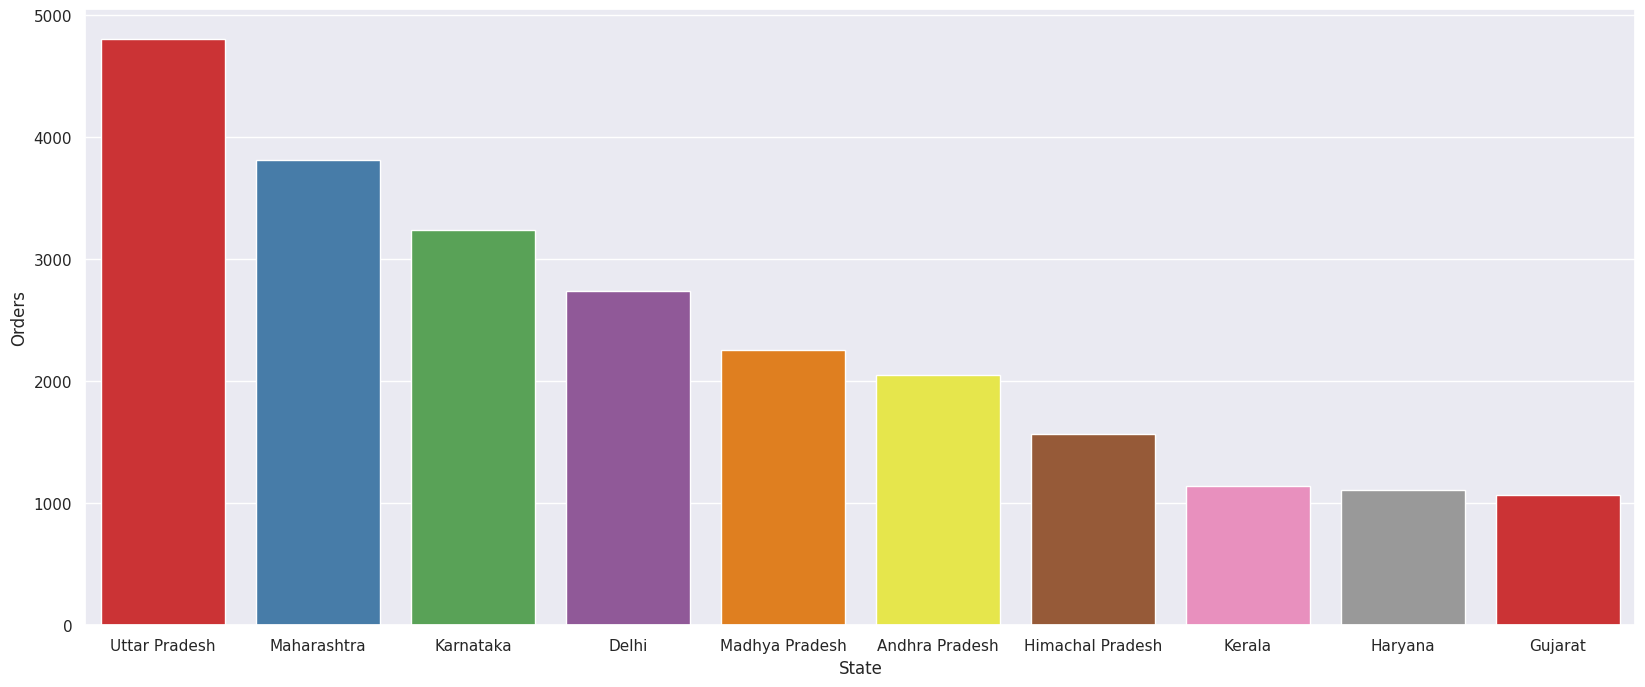

In [30]:
# Total number of order from top 10 satates.
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head (10)
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(data = sales_state, x = 'State', y = 'Orders',palette='Set1')

Above Graph we can see number of orders acording to states.

<ipython-input-31-c145115f1b00>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'State', y = 'Amount',palette='Set1')


<Axes: xlabel='State', ylabel='Amount'>

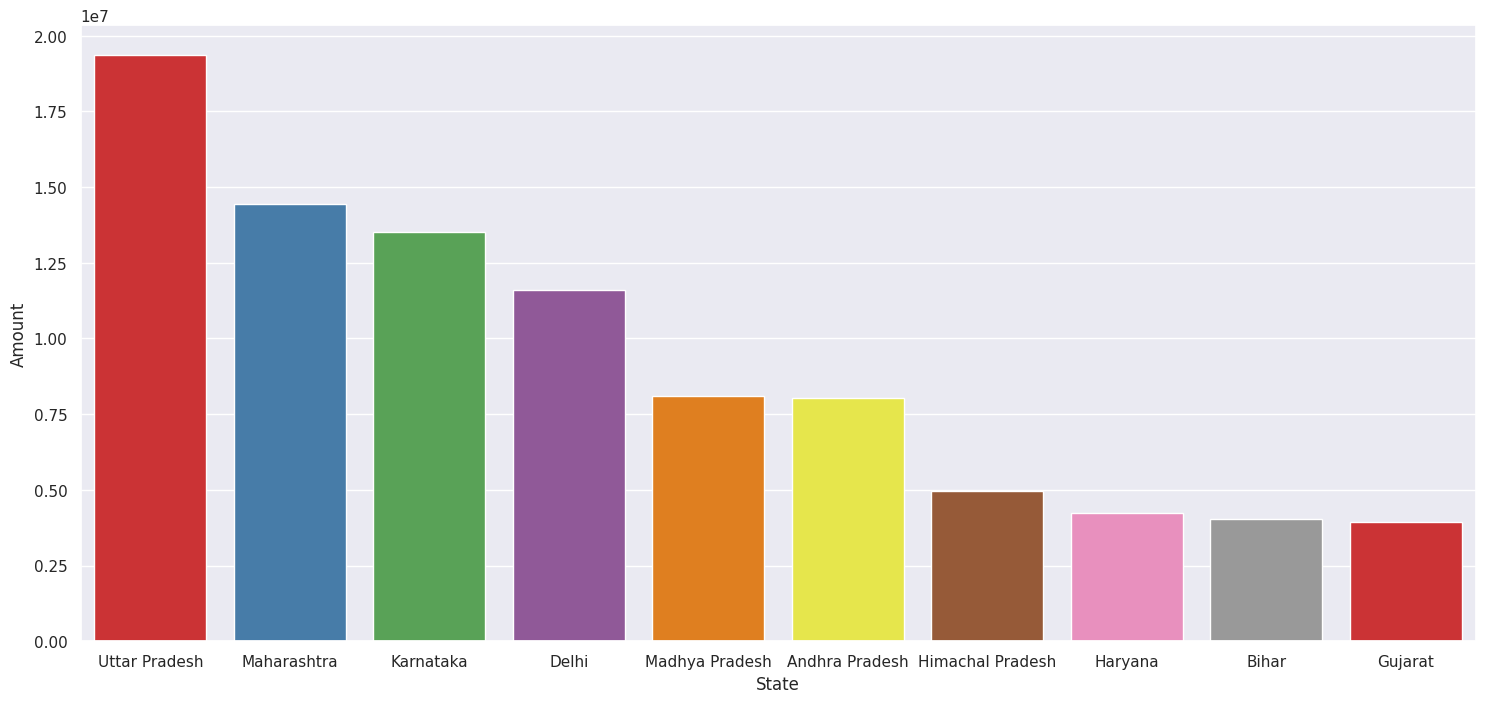

In [31]:
# Top 10 States acording to spend amount
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head (10)
sns.set(rc={'figure.figsize':(18,8)})
sns.barplot(data = sales_state, x = 'State', y = 'Amount',palette='Set1')

In this above graph we cans show chart acording to spend amount top 10 states.

In [32]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

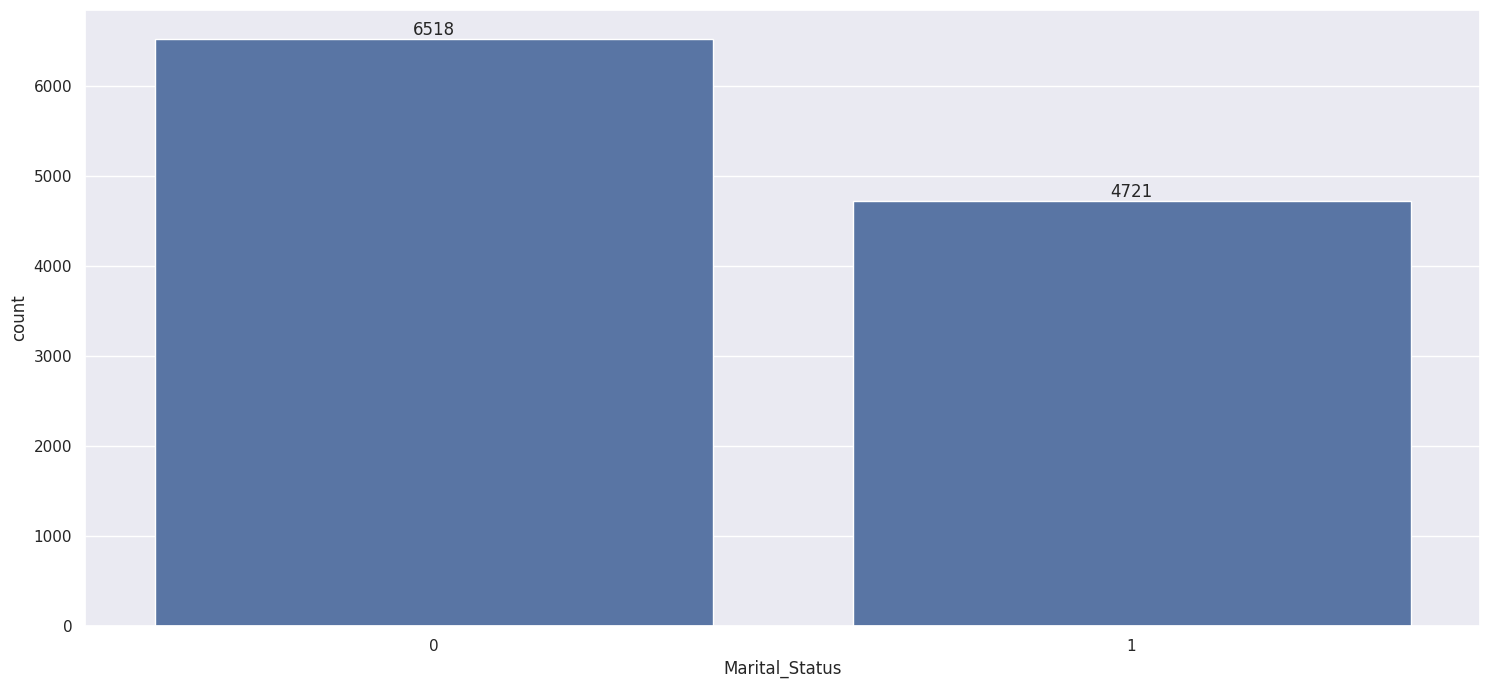

In [33]:
ax = sns.countplot(data = df, x = 'Marital_Status')
for bars in ax.containers:
  ax.bar_label(bars)
sns.set(rc={'figure.figsize':(8,3)})

<Axes: xlabel='Marital_Status', ylabel='Amount'>

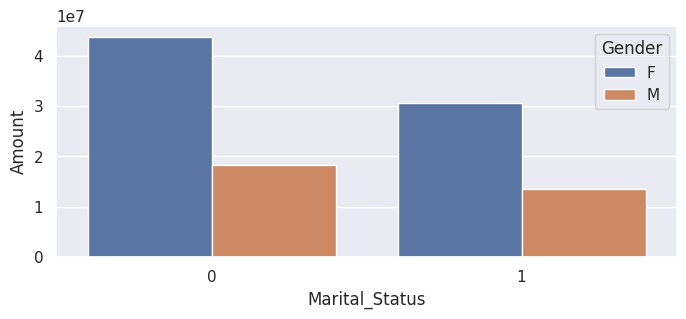

In [34]:
sales_status = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by= 'Amount', ascending = False)
sns.set(rc={'figure.figsize':(8,3)})
sns.barplot(data = sales_status, x= 'Marital_Status', y= 'Amount', hue= 'Gender')

We can see accoring above graph married women spend hieghly purchesing power..

<ipython-input-35-825c9faae241>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Occupation', palette='Set1')


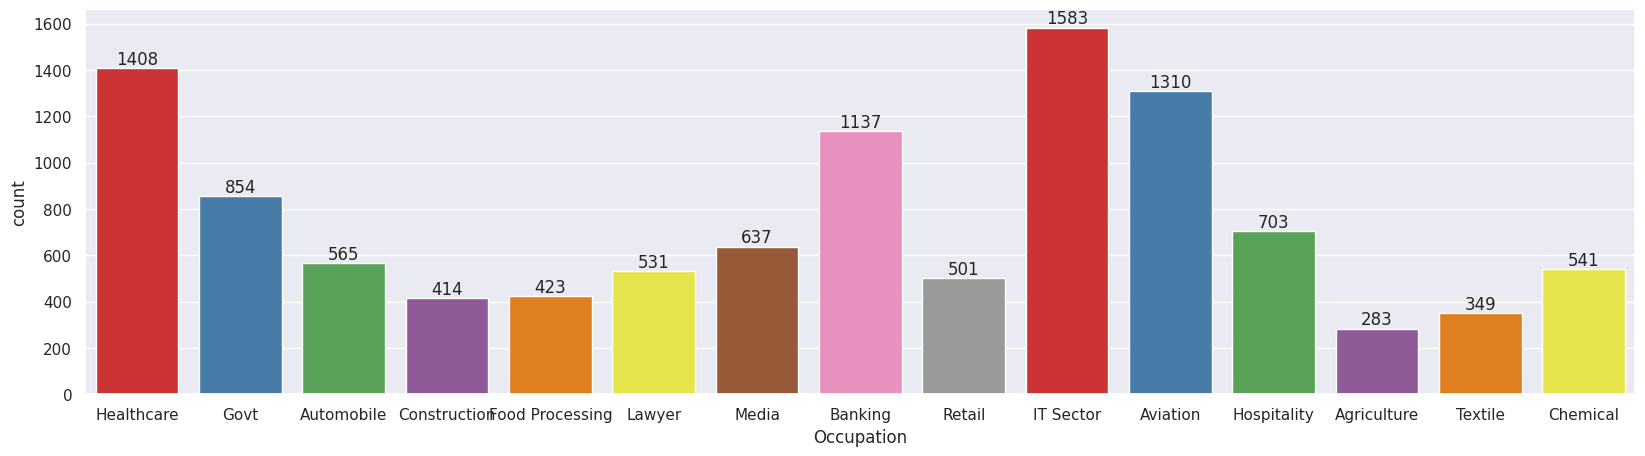

In [35]:
# Analysis graph acording to Occupation.
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation', palette='Set1')
for bars in ax.containers:
  ax.bar_label(bars)

<ipython-input-36-e709fa530ee6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'Occupation', y = 'Amount', palette='Set1')


<Axes: xlabel='Occupation', ylabel='Amount'>

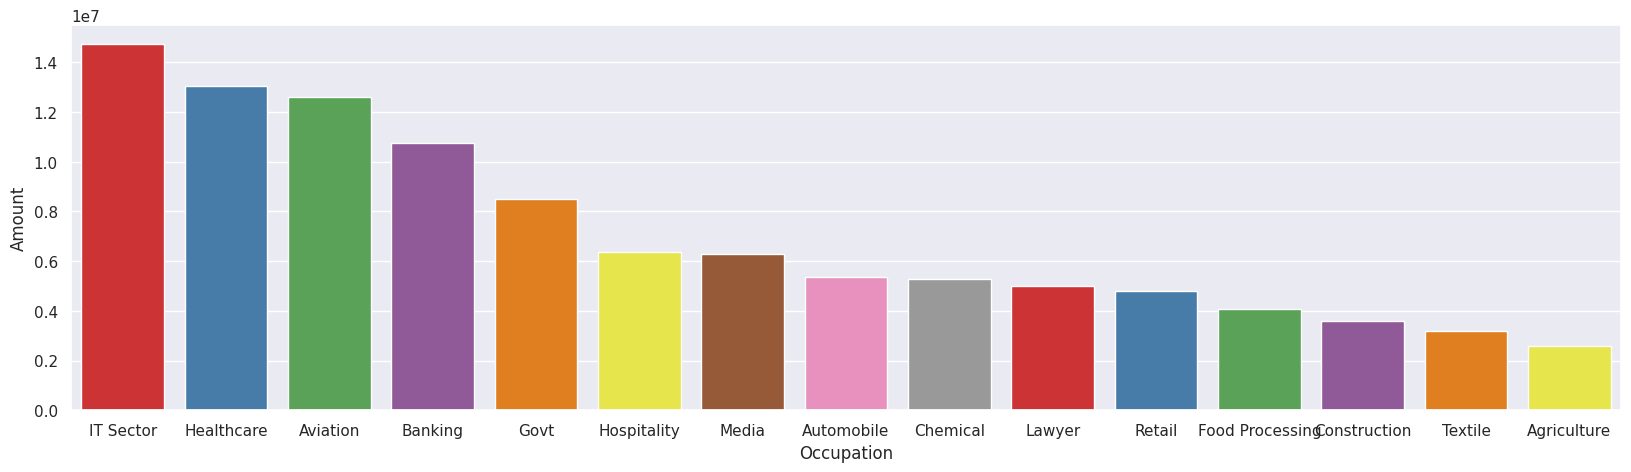

In [36]:
# Occupation acording to Amount
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation', y = 'Amount', palette='Set1')

most of the buyer are working in IT feild.

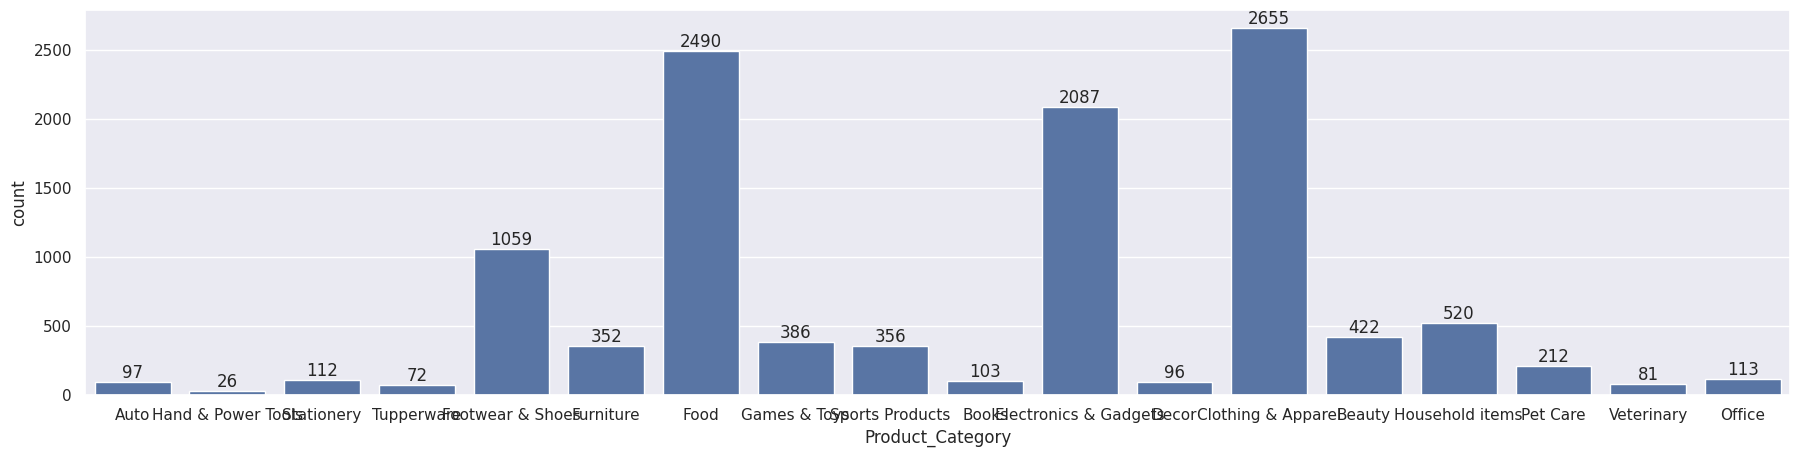

In [37]:
# Acording to Product Category
sns.set(rc={'figure.figsize':(22,5)})
ax = sns.countplot(data = df, x = 'Product_Category')
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

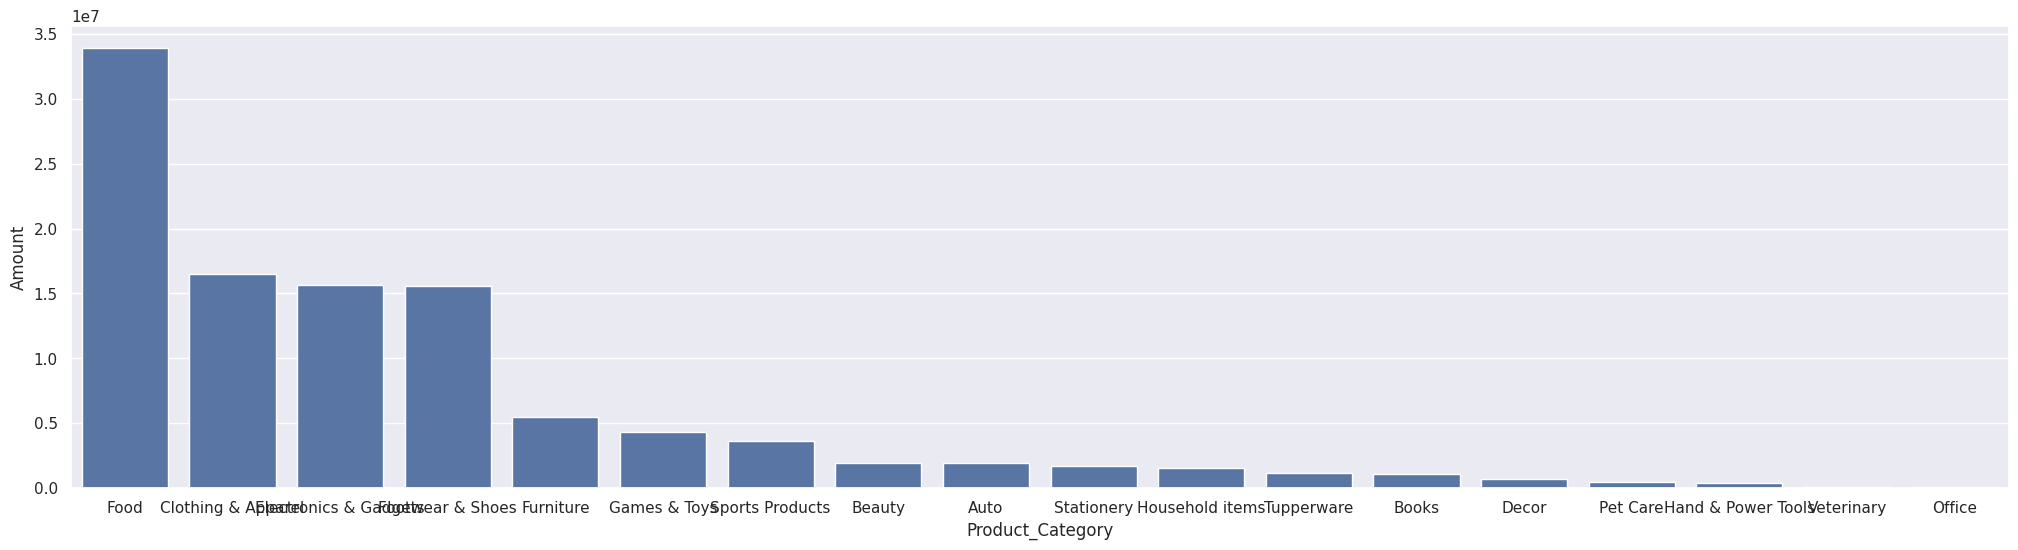

In [38]:
sales_status = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.set(rc={'figure.figsize':(25,6)})
sns.barplot(data = sales_status, x= 'Product_Category', y= 'Amount')

<ipython-input-39-6efcd0345f09>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_status, x= 'Product_ID', y= 'Orders', palette='Set1')


<Axes: xlabel='Product_ID', ylabel='Orders'>

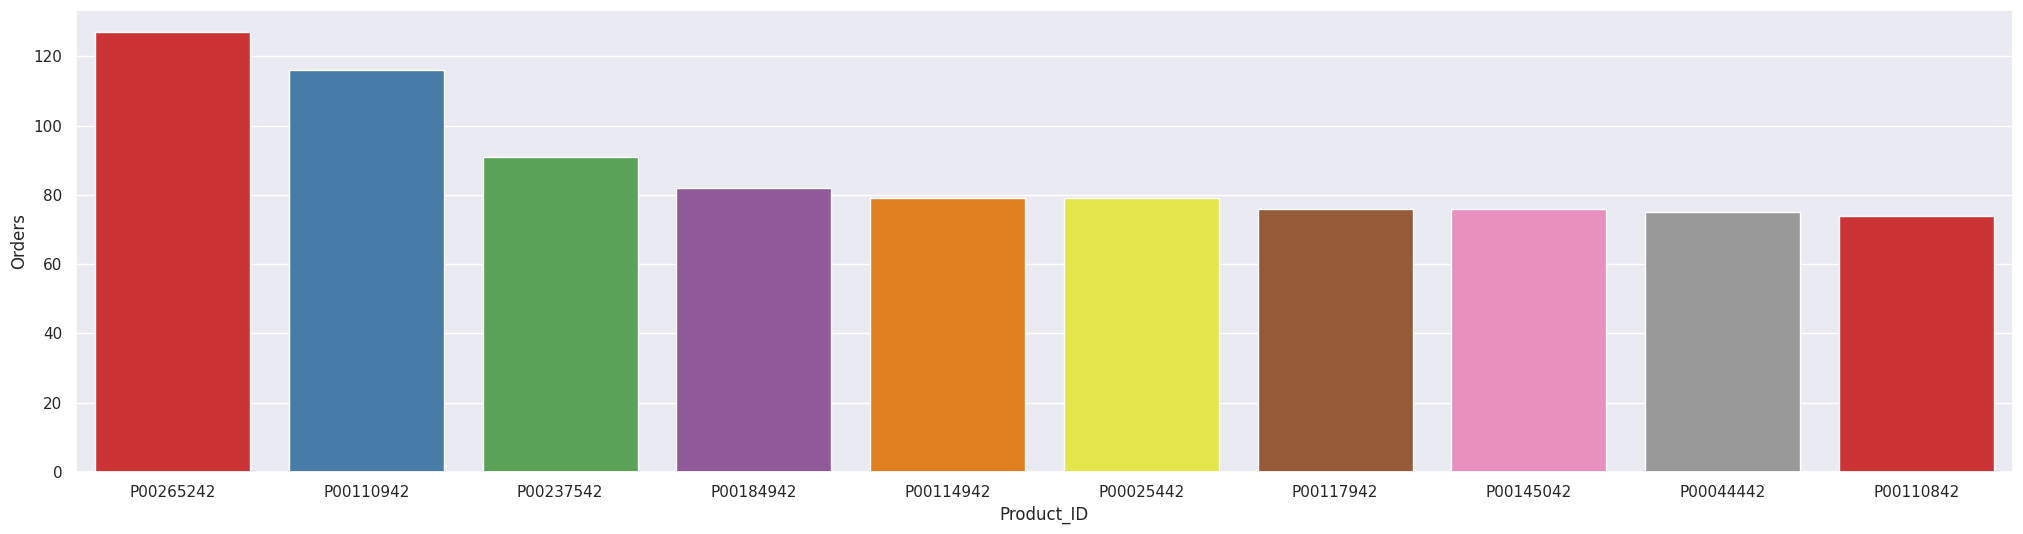

In [39]:
sales_status = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.set(rc={'figure.figsize':(25,6)})
sns.barplot(data = sales_status, x= 'Product_ID', y= 'Orders', palette='Set1')

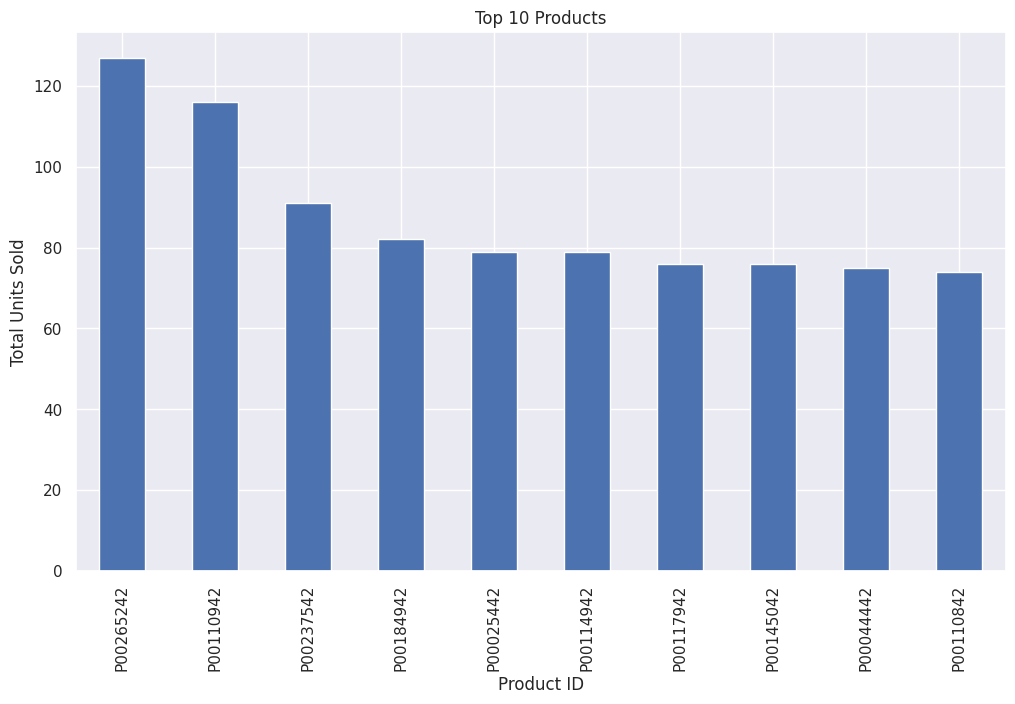

In [43]:
# Top 10 most soled product
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Product ID')
plt.ylabel('Total Units Sold')
plt.title('Top 10 Products')
plt.show()